In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import graphviz

In [2]:
df = pd.read_csv('Data/Iris/Iris-cleaned.csv')
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### (a) Preprocessing:

In [3]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species          object
dtype: object

In [4]:
df.species = df.species.astype('category')

Randomize the order of the records using the command below.

In [5]:
df = df.sample(frac=1.0,random_state=0)

### (b) Fit a depth 2 decision tree for predicting iris species. Define classes as shown below

In [6]:
class_names = df.species.cat.categories
class_names

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [7]:
attributes = df.drop(['species'], axis = 1) #continuous -> one hot encode
attributes = pd.get_dummies(attributes)
target = df.species

In [8]:
Tree = tree.DecisionTreeClassifier()

In [9]:
Tree = tree.DecisionTreeClassifier(max_depth = 2)
Tree.fit(attributes,target)

DecisionTreeClassifier(max_depth=2)

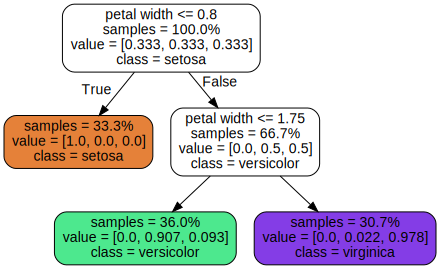

In [10]:
dot_data = tree.export_graphviz(Tree,
                               out_file=None,
                               feature_names=attributes.columns,
                               class_names = df.species.cat.categories,
                               proportion=True,
                               impurity=False,
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph.render('Iris')
graph

### (c) Compute species group averages for the attributes and use these attribute averages to check that your decision tree is reasonable.


In [11]:
df_mean = df.groupby('species').mean()
df_mean

,sepal length,sepal width,petal length,petal width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


The average petal length of setosa is significantly smaller than others. Most setosa have petal length <= 2.45.
Tt is reasonable to use petal width as an attribute to categorize because most versicolors have petal width <= 1.75 and most virginicas have petal width > 1.75.

In [12]:
Tree.predict(df_mean)==df_mean.index

array([ True,  True,  True])

So the te deicison tree is reasonable

### (d) Use cross-validation and the hyper-parameters shown below to determine a tree that minimizes generalization error.

In [13]:
Tree = tree.DecisionTreeClassifier()
# 'min_samples_split': [5,10,15,20,25,30,35,40,45,50,55,60,65,70] -> output is 40 -> check number around 40
# then: 'min_samples_split': [35,36,37,38,39,40,41,42,43,44,45]
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10], 'min_samples_split': [2,3,4,5,6,7,8,9,10]}
TreeCV = GridSearchCV(Tree, param_grid = parameters, n_jobs=-1) 
TreeCV.fit(attributes,target)
print(TreeCV.best_params_)
print(TreeCV.best_score_)
print(TreeCV.best_estimator_)

{'max_depth': 3, 'min_samples_split': 2}
0.96
DecisionTreeClassifier(max_depth=3)


max depth — maximum depth of the tree.

min samples split — mimimum size of a node that is allowed to be split. (Regulates the
complexity of the tree.)

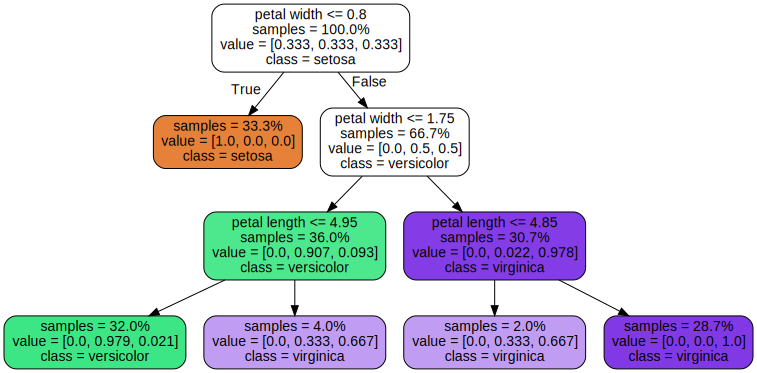

In [14]:
dot_data = tree.export_graphviz(TreeCV.best_estimator_,
                               out_file=None,
                               feature_names=attributes.columns,
                               class_names = df.species.cat.categories,
                               proportion=True,
                               impurity=False,
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph.render('ValidIris')
graph

In [15]:
#results = pd.DataFrame()
#results['depth'] = parameters['max_depth']
#results['valid error'] = 1 - TreeCV.cv_results_['mean_test_score'].mean()
#results.head()
#results.plot.line(x='depth',y='valid error')